# Supervised machine learning
Supervised machine learning is a technique for configuring (learning) parameters of a computational model based on annotated data. In this example, we provide sparsely annotated data, which means we only annotate some of the given data points.

See also
* [Supervised learning (Wikipedia)](https://en.wikipedia.org/wiki/Supervised_learning)
* [Supervised learning in scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

Our starting point for demonstrating supervised machine learning is a a pair of measurements in a bimodal distribution. In the following data set objects with a larger area are typically also more elongated.

Text(0, 0.5, 'elongation')

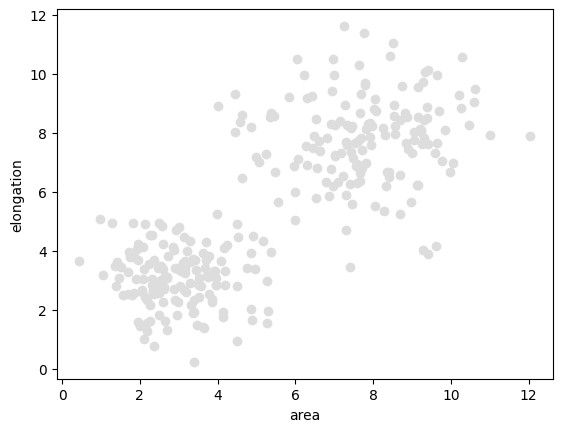

In [2]:
data = generate_biomodal_2d_data()

plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

To get a more detailed insight into the data, we print out the first entries.

In [3]:
data_to_annotate = data[:20]

pd.DataFrame(data_to_annotate, columns=["area", "elongation"])

,area,elongation
0,3.950088,2.848643
1,4.955912,3.390093
2,7.469852,5.575289
3,2.544467,3.017479
4,3.465662,1.463756
5,3.156507,3.232181
6,9.978705,6.676372
7,6.001683,5.047063
8,2.457139,3.416050
9,3.672295,3.407462


## Annotating data
As mentioned above, supervised machine learning algorithms need some form of annotation, also called _ground truth_. We create a list of annotations where `1` represents small objects and `2` represents large and elongated objects.

Note: We are here annotating the first 20 data points, which is a quite small number. In real projects, larger amounts of annotation data might be necessary to train well-performing classifiers.

In [4]:
manual_annotation = [1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2]

Now, we visualize the measurements again and draw the annotated measurements on top.

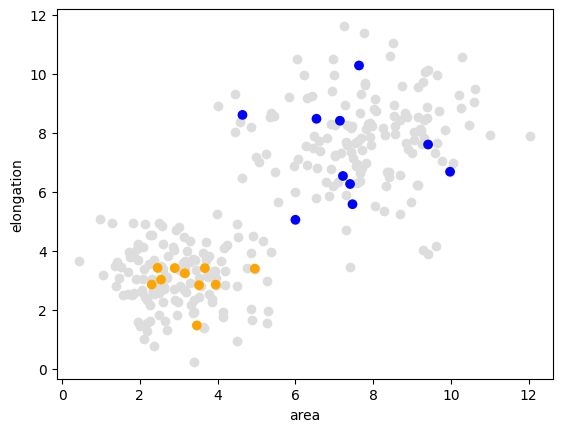

In [5]:
plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

colors = ['orange', 'blue']
annotated_colors = [colors[i-1] for i in manual_annotation]

plt.scatter(data_to_annotate[:, 0], data_to_annotate[:, 1], c=annotated_colors)

## Separating test and validation data
Before we train our classifier, we need to split the annotated data into two subsets. Goal is to enable unbiased validation. We train on the first half of the annotated data points and measure the quality on the second half. [Read more](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage).

In [6]:
train_data = data_to_annotate[:10]
validation_data = data_to_annotate[10:]

train_annotation = manual_annotation[:10]
validation_annotation = manual_annotation[10:]

## Classifier training
With the selected data to annotate and the manual annotation, we can train a [Random Forest Classifier](https://en.wikipedia.org/wiki/Random_forest).

In [7]:
classifier = RandomForestClassifier()
classifier.fit(train_data, train_annotation)

RandomForestClassifier()

## Validation
We can now apply the classifier to the validation data and measure how many of these data points have been analyzed correctly.

In [8]:
result = classifier.predict(validation_data)

# Show results next to annotation in a table
result_annotation_comparison_table = {
    "Predicted": result,
    "Annotated": validation_annotation
}
pd.DataFrame(result_annotation_comparison_table)

,Predicted,Annotated
0,2,2
1,1,1
2,1,1
3,1,2
4,1,1
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


To get some standardized measures of the quality of the results of our classifier, we use [scikit-learn's metrics](https://scikit-learn.org/stable/modules/model_evaluation.html). An overview about the techniques are also available on [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) and mean in the context here:
* [Accurcay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score): What portion of predictions were correct?
* [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): What portion of predicted `1`s were annotated as `1`?
* [Recall (sensitivity)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score): What portion of predicted `2`s have been annotated as `2`?

In [9]:
accuracy_score(validation_annotation, result)

0.9

In [10]:
precision_score(validation_annotation, result)

0.75

In [11]:
recall_score(validation_annotation, result)

1.0

If you want to understand more detailed how the enties are counted and the quality scores are computed, the [multilabel confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix) may be worth a look.

## Prediction
After training and validation of the classifier, we can reuse it to process other data sets. 
It is uncommon to classify test- and validation data, as those should be used for making the classifier only. We here apply the classifier to the remaining data points, which have not been annotated.

In [12]:
remaining_data = data[20:]

prediction = classifier.predict(remaining_data)
prediction

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2])

Here we now visualize the whole data set with class colors.

Text(0, 0.5, 'elongation')

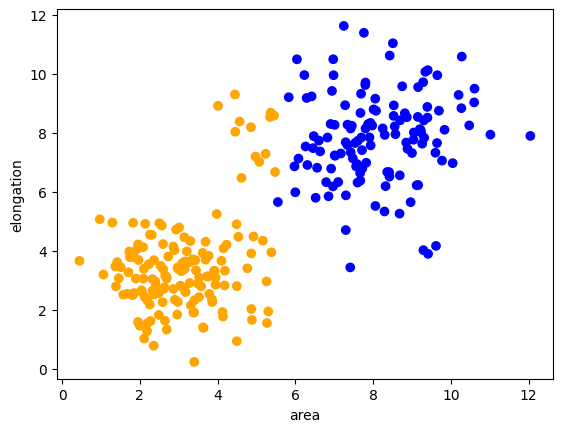

In [13]:
predicted_colors = [colors[i-1] for i in prediction]

plt.scatter(remaining_data[:, 0], remaining_data[:, 1], c=predicted_colors)
plt.xlabel('area')
plt.ylabel('elongation')

## Exercise
Train a [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html) and visualize its prediction.

In [14]:
from sklearn.svm import SVC

classifier = SVC()